<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/data_analytics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression plot and prediction interval

In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("icecream.xlsx")
df


,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


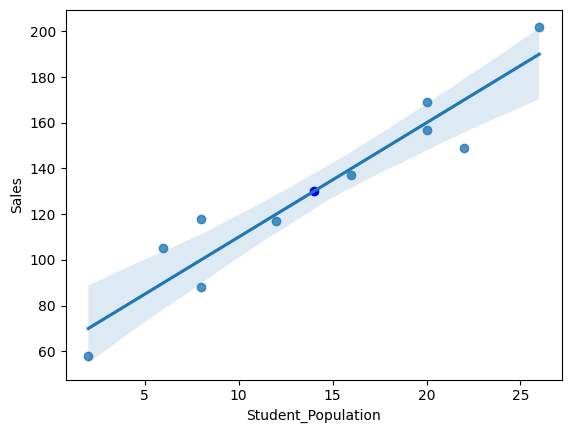

In [20]:
x = df["Student_Population"]
y = df["Sales"]
plt.figure()
sns.regplot(x=x,y=y,data=df,fit_reg = True)
plt.scatter(np.mean(x),np.mean(y),color="blue")

Prediction interval

In [22]:
import statsmodels.api as s
population = df["Student_Population"]
sale = df["Sales"]
population = s.add_constant(population)
model = s.OLS(sale,population)
result = model.fit()
result.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           2.55e-05
Time:                        15:41:22   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(result,alpha=0.05)
fittedvalues = data[:,2]
predict_mean_df = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_app = data[:,6:8].T

In [26]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977126,  87.10977126,
       109.56629807, 129.56629807, 147.10977126, 147.10977126,
       155.2931351 , 171.03868339])

In [27]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022874, 112.89022874,
       130.43370193, 150.43370193, 172.89022874, 172.89022874,
       184.7068649 , 208.96131661])

In [28]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [29]:
 predict_ci_app

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])